In [3]:
from __future__ import unicode_literals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

# Paths del binario que mide tiempos
medidor = './tiempos'
unidad = 'micros'

# Variables de estadísticos
muestras = 5


# Tiempos GRID exhaustivo variando C

In [48]:
ai = '-gre 500'
NN = [1,2,3,4]
MM = [1,2,3,4]
# C de 1 a min(M,N)

tiempos = np.zeros((4,4,4))

for N in NN:
    for M in MM:
        for C in range(1,min(N,M)+1):
            tt = []
            for k in range(muestras):
                P = N*M
                command = medidor+' '+str(N)+' '+str(M)+' '+str(C)+' '+str(P)
                command+=' -t '+unidad+' '+ai
                tt.append(float(os.popen(command).read()))
            print(command,np.min(tt))
            tiempos[N-1][M-1][C-1] = np.min(tt)
            
np.save('save/tiempos_grid_exh.npy',tiempos)


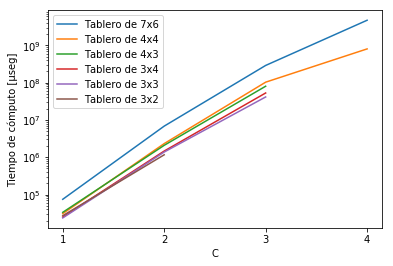

In [2]:
tiempos = np.load('save/tiempos_grid_exh.npy')

# Este lo hago a mano
tiempos76 = [74463,6.8301e+06, 2.89665e+08, 4.72078e+09]

CC = [1,2,3,4]
# Format plot
plt.figure()
plt.xticks(CC)
plt.yscale('log')
plt.xlabel('C')
plt.ylabel('Tiempo de cómputo [μseg]')

# Data
plt.plot(CC, tiempos76, label="Tablero de 7x6")
plt.plot(CC,tiempos[3][3],label='Tablero de 4x4')
plt.plot(CC[:-1],tiempos[3][2][:-1],label='Tablero de 4x3')
plt.plot(CC[:-1],tiempos[2][3][:-1],label='Tablero de 3x4')
plt.plot(CC[:-1],tiempos[2][2][:-1],label='Tablero de 3x3')
plt.plot(CC[:-2],tiempos[2][1][:-2],label='Tablero de 3x2')
plt.legend(loc='best')
plt.savefig('plots/grid_ext_tiempos.pdf')
plt.show()

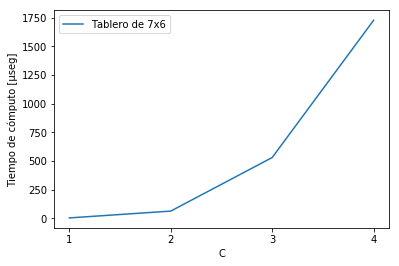

In [73]:
tiempos = np.load('save/tiempos_grid_exh.npy')

# Este lo hago a mano
tiempos76 = [74463,6.8301e+06, 2.89665e+08, 4.72078e+09]
tiempos76 = [tiempos76[i-1]/(7*(5**(i+4))) for i in range(1,len(tiempos76)+1)]
tiempos76
CC = [1,2,3,4]
# Format plot
plt.figure()
plt.xticks(CC)
# plt.yscale('log')
plt.xlabel('C')
plt.ylabel('Tiempo de cómputo [μseg]')

# Data
plt.plot(CC, tiempos76, label="Tablero de 7x6")
# plt.plot(CC,tiempos[3][3],label='Tablero de 4x4')
# plt.plot(CC[:-1],tiempos[3][2][:-1],label='Tablero de 4x3')
# plt.plot(CC[:-1],tiempos[2][3][:-1],label='Tablero de 3x4')
# plt.plot(CC[:-1],tiempos[2][2][:-1],label='Tablero de 3x3')
# plt.plot(CC[:-2],tiempos[2][1][:-2],label='Tablero de 3x2')
plt.legend(loc='best')
plt.show()

## Veamos ahora para N=4, M=4 y c variado, distintas discretizaciones

In [3]:
data = pd.DataFrame([], index=[5,7,9,11])
data['1'] = [41291,538104,1.07442e+06,3.60991e+06]
data['2'] = [2.35729e+06,2.45923e+07,1.48847e+08,7.29969e+08]
data['3'] = [1.7721e+08,1.67822e+09,1.15344e+10,0]
data.to_pickle('save/tiempos_grid_tamanio.npy')

#para tablero de 3x3
data3 = pd.DataFrame([], index=[5,7,9,11])
data3['1'] = [32137,195628,785913,2.64341e+06]
data3['2'] = [1.4034e+06,1.45899e+07,8.9295e+07,3.5131e+08]

display(data)
display(data3)

,1,2,3
5,41291.0,2357290.0,1.772100e+08
7,538104.0,24592300.0,1.678220e+09
9,1074420.0,148847000.0,1.153440e+10
11,3609910.0,729969000.0,0.000000e+00


,1,2
5,32137.0,1403400.0
7,195628.0,14589900.0
9,785913.0,89295000.0
11,2643410.0,351310000.0


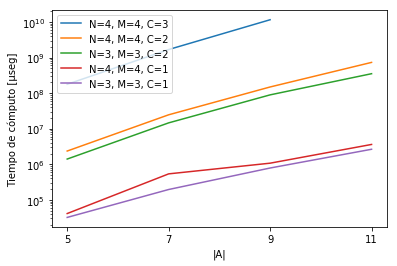

In [4]:
# Data
data = pd.read_pickle('save/tiempos_grid_tamanio.npy')
plt.plot(data["3"][:-1], label="N=4, M=4, C=3")
plt.plot(data["2"], label="N=4, M=4, C=2")
plt.plot(data3["2"], label="N=3, M=3, C=2")
plt.plot(data["1"], label="N=4, M=4, C=1")
plt.plot(data3["1"], label="N=3, M=3, C=1")



plt.legend(loc='best')
plt.yscale('log')
plt.xlabel('|A|')
plt.xticks(data.index)
plt.ylabel('Tiempo de cómputo [μseg]')
plt.savefig('plots/grid_ext_tamanio.pdf')

plt.show()


## Busqueda Local solo victorias, vemos cuanto logra avanzar en funcion de steps


In [16]:
steps = [12.5,14.2,18.2,25,28.5,33.3,40,50,75,100,125,150,175,200,225,250]
cant_steps = [ 2000/step for step in steps]
# flashie y los corri a manopla pero ya estan
filenames = ['save/grid/vict_{}.txt'.format(step) for step in steps]
means = []
stds = []

In [17]:
for i in range(len(steps)):
    data = pd.read_csv(filenames[i],sep='\n', squeeze=True, header=None)
    data = data[data<np.percentile(data, 98)]
    means.append(data.mean())
    stds.append(data.std())

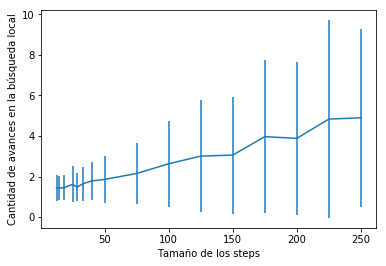

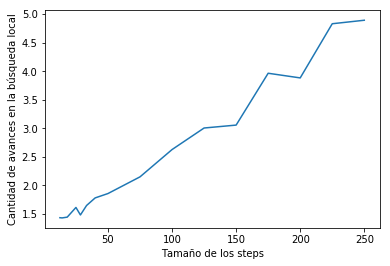

In [19]:
plt.errorbar(steps,means, yerr=stds)
# plt.legend()
plt.xlabel('Tamaño de los steps')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/victoria_steps_err.pdf')
plt.show()

plt.plot(steps,means)
plt.xlabel('Tamaño de los steps')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/victoria_steps.pdf')
plt.show()

#### Ahora en funcion de la cantidad de step en el rango

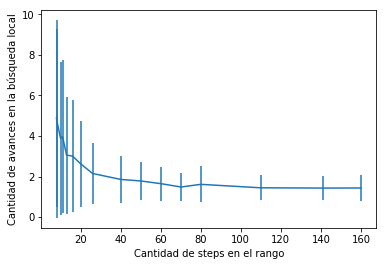

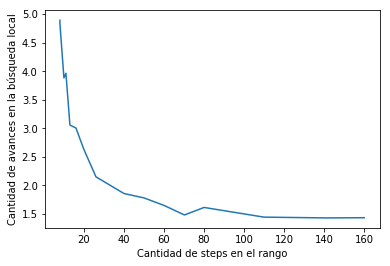

In [20]:
plt.errorbar(cant_steps,means, yerr=stds)
# plt.legend()
plt.xlabel('Cantidad de steps en el rango')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/victoria_cant_steps_err.pdf')
plt.show()

plt.plot(cant_steps,means)
plt.xlabel('Cantidad de steps en el rango')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/victoria_cant_steps.pdf')
plt.show()

## Busqueda Local tambien con empates, vemos cuanto logra avanzar en funcion de steps


In [21]:
steps = [12.5,14.2,18.2,25,28.5,33.3,40,50,75,100,125,150,175,200,225,250]
cant_steps = [ 2000/step for step in steps]
# flashie y los corri a manopla pero ya estan
filenames = ['save/grid/emp_{}.txt'.format(step) for step in steps]
means_emp = []
stds_emp = []

In [22]:
for i in range(len(steps)):
    data = pd.read_csv(filenames[i],sep='\n', squeeze=True, header=None)
    data = data[data<np.percentile(data, 98)]
    means_emp.append(data.mean())
    stds_emp.append(data.std())

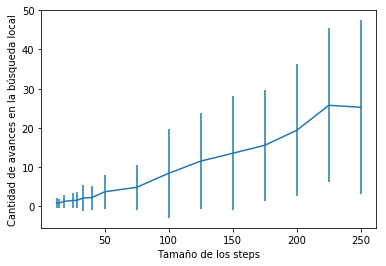

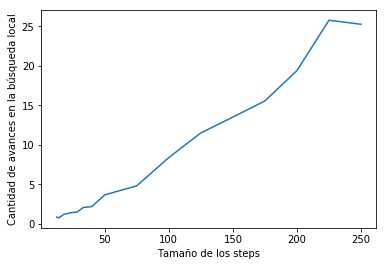

In [23]:
plt.errorbar(steps,means_emp, yerr=stds_emp)
# plt.legend()
plt.xlabel('Tamaño de los steps')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/empate_steps_err.pdf')
plt.show()

plt.plot(steps,means_emp)
plt.xlabel('Tamaño de los steps')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/empate_steps.pdf')
plt.show()

#### Ahora en funcion de la cantidad de step en el rango

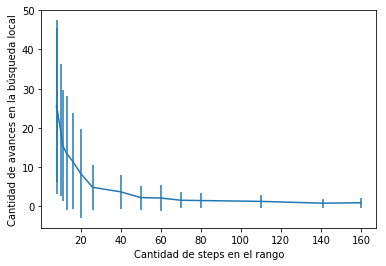

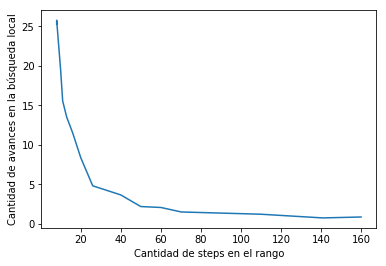

In [24]:
plt.errorbar(cant_steps,means_emp, yerr=stds_emp)
# plt.legend()
plt.xlabel('Cantidad de steps en el rango')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/empate_cant_steps_err.pdf')
plt.show()

plt.plot(cant_steps,means_emp)
plt.xlabel('Cantidad de steps en el rango')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/empate_cant_steps.pdf')
plt.show()

### Ahora ponemos el de empates y victorias en el mismo grafico

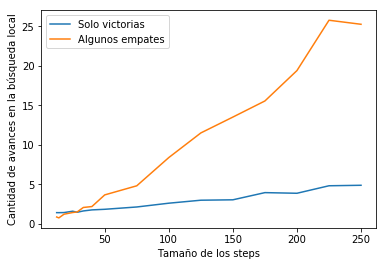

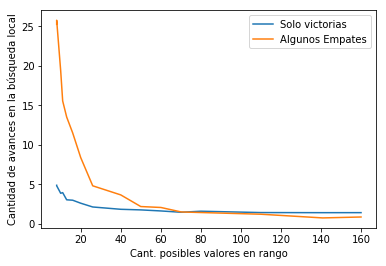

[160.0, 140.84507042253523, 109.8901098901099, 80, 70.17543859649123, 60.06006006006007, 50, 40, 26, 20, 16, 13, 11, 10, 8, 8]
[1.4336734693877551, 1.4300518134715026, 1.4438502673796791, 1.6134020618556701, 1.4818652849740932, 1.6479591836734695, 1.7806122448979591, 1.8571428571428572, 2.1494845360824741, 2.6275510204081631, 3.0051282051282051, 3.056122448979592, 3.9642857142857144, 3.8826530612244898, 4.8316326530612246, 4.8928571428571432]
[0.88265306122448983, 0.76683937823834192, 1.2346938775510203, 1.4489795918367347, 1.5204081632653061, 2.0867346938775508, 2.204081632653061, 3.6769230769230767, 4.8265306122448983, 8.3979591836734695, 11.510204081632653, 13.51530612244898, 15.551020408163266, 19.393782383419691, 25.755102040816325, 25.244897959183675]


In [29]:
plt.plot(steps,means, label="Solo victorias")
plt.plot(steps,means_emp, label="Algunos empates")
plt.legend()
plt.xlabel('Tamaño de los steps')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/both_steps.pdf')
plt.show()

plt.plot(cant_steps,means, label="Solo victorias")
plt.plot(cant_steps,means_emp, label="Algunos Empates")
plt.legend()
plt.xlabel('Cant. posibles valores en rango')
plt.ylabel('Cantidad de avances en la búsqueda local')
plt.savefig('plots/grid/both_cant_steps.pdf')
plt.show()

print cant_steps
print means
print means_emp

## Diff gridsearch

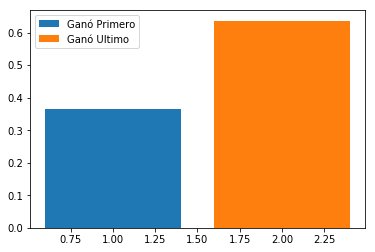

In [80]:
data = pd.read_csv('save/grid/diff_local.csv', header=None)
cant_vict = np.histogram(data[data[3]>0][3])
cant = cant_vict[0][0] + cant_vict[0][-1]
plt.bar(1,float(cant_vict[0][0])/cant, label='Ganó Primero')
plt.bar(2,float(cant_vict[0][-1])/cant, label='Ganó Ultimo')
plt.legend(loc='best')
plt.show()
# display(data)

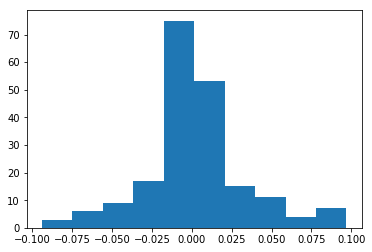

count    200.000000
mean       0.002315
std        0.031049
min       -0.094000
25%       -0.008838
50%        0.000250
75%        0.011288
max        0.097000
Name: 1, dtype: float64

In [81]:
diff = np.subtract(data[1],data[0])
plt.hist(diff)
plt.show()
diff.describe()

In [82]:
data[2].describe()

count    200.00000
mean      22.35500
std       20.69615
min        0.00000
25%        7.00000
50%       17.00000
75%       33.00000
max      100.00000
Name: 2, dtype: float64

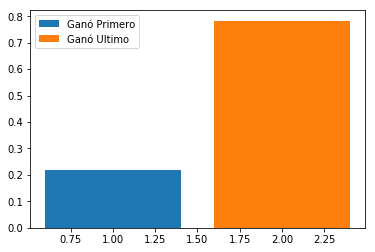

In [83]:
data5 = pd.read_csv('save/grid/diff_local5.csv', header=None)
cant_vict = np.histogram(data5[data5[3]>0][3])
cant = cant_vict[0][0] + cant_vict[0][-1]
plt.bar(1,float(cant_vict[0][0])/cant, label='Ganó Primero')
plt.bar(2,float(cant_vict[0][-1])/cant, label='Ganó Ultimo')
plt.legend(loc='best')
plt.show()
# display(data)

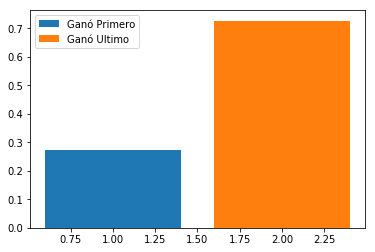

In [94]:
data10 = pd.read_csv('save/grid/diff_local10.csv', header=None)
cant_vict = np.histogram(data10[data10[1]>0][1])
cant = cant_vict[0][0] + cant_vict[0][-1]
plt.bar(1,float(cant_vict[0][0])/cant, label='Ganó Primero')
plt.bar(2,float(cant_vict[0][-1])/cant, label='Ganó Ultimo')
plt.legend(loc='best')
plt.show()
# display(data10)

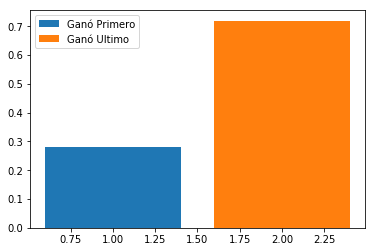

In [115]:
data13 = pd.read_csv('save/grid/diff_local13.csv', header=None)
cant_vict = np.histogram(data13[data13[1]>0][1])
cant = cant_vict[0][0] + cant_vict[0][-1]
plt.bar(1,float(cant_vict[0][0])/cant, label='Ganó Primero')
plt.bar(2,float(cant_vict[0][-1])/cant, label='Ganó Ultimo')
plt.legend(loc='best')
plt.show()

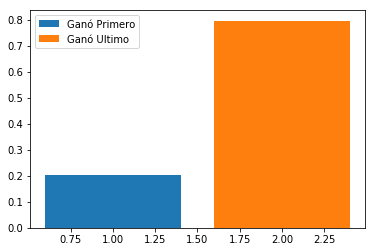

In [120]:
data7 = pd.read_csv('save/grid/diff_local7.csv', header=None)
cant_vict = np.histogram(data7[data7[1]>0][1])
cant = cant_vict[0][0] + cant_vict[0][-1]
plt.bar(1,float(cant_vict[0][0])/cant, label='Ganó Primero')
plt.bar(2,float(cant_vict[0][-1])/cant, label='Ganó Ultimo')
plt.legend(loc='best')
plt.show()

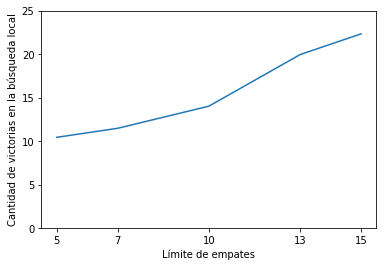

In [149]:
f, ax = plt.subplots(1)
medias=[data5[2].mean(), data7[0].mean(),data10[0].mean(), data13[0].mean(), data[2].mean()]
plt.plot([5,7,10,13,15] ,medias)
eje_x = [5,7,10,13,15]
plt.xticks(eje_x)
plt.xlabel('Límite de empates')
plt.ylabel('Cantidad de victorias en la búsqueda local')
ax.set_ylim(ymin=0, ymax=25)
plt.show(f)

[0.2169811320754717, 0.2037037037037037, 0.2727272727272727, 0.2809917355371901, 0.36363636363636365]
[0.7830188679245284, 0.7962962962962963, 0.7272727272727273, 0.71900826446281, 0.6363636363636364]


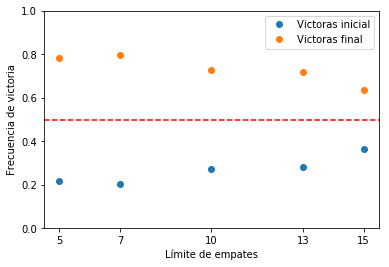

In [151]:
files = ['save/grid/diff_local7.csv','save/grid/diff_local10.csv','save/grid/diff_local13.csv']
porcentaje1 = []
porcentaje2 = []

data = pd.read_csv('save/grid/diff_local5.csv', header=None)
cant_vict = np.histogram(data[data[3]>0][3])
cant = cant_vict[0][0] + cant_vict[0][-1]
porcentaje1.append(float(cant_vict[0][0])/cant)
porcentaje2.append(float(cant_vict[0][-1])/cant)

for fil in files:
    datos = pd.read_csv(fil, header=None)
    cant_vict = np.histogram(datos[datos[1]>0][1])
    cant = cant_vict[0][0] + cant_vict[0][-1]
    porcentaje1.append(float(cant_vict[0][0])/cant)
    porcentaje2.append(float(cant_vict[0][-1])/cant)
    
data = pd.read_csv('save/grid/diff_local.csv', header=None)
cant_vict = np.histogram(data[data[3]>0][3])
cant = cant_vict[0][0] + cant_vict[0][-1]
porcentaje1.append(float(cant_vict[0][0])/cant)
porcentaje2.append(float(cant_vict[0][-1])/cant)

print porcentaje1
print porcentaje2

eje_x = [5,7,10,13,15]
f, ax = plt.subplots(1)
plt.plot(eje_x,porcentaje1,'o', label="Victoras inicial")
plt.plot(eje_x,porcentaje2,'o', label="Victoras final")
ax.axhline(0.5, color = 'r',linestyle='dashed')
ax.legend()
plt.xticks(eje_x)
plt.xlabel('Límite de empates')
plt.ylabel('Frecuencia de victoria')
ax.set_ylim(ymin=0, ymax=1)
plt.show(f)